# Распознавание моделей одежды из набора данных Fashion MNIST

Конструкции Keras, упрощающие написание кода

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/introduction/fashion_mnist_syntactic_sugar.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Rescaling
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [4]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [5]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

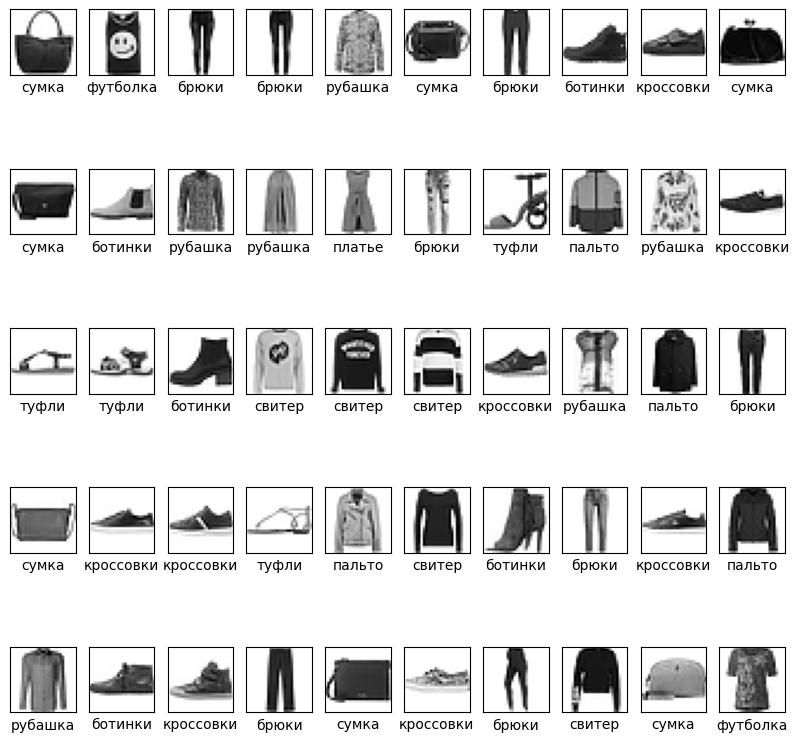

In [6]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

## Создаем нейронную сеть

**Создаем последовательную модель**

In [7]:
# Создаем последовательную модель
model = Sequential(
    [   
        # Слой, который преобразует матрицу 28х28 в плоский вектор
        Flatten(),
        # Слой нормализации
        Rescaling(1./255),
        # Входной полносвязный слой, 800 нейрона
        # Количество входов не указываем, Keras определяет автоматически
        # после первого запуска
        Dense(800, activation="relu"),
        # Выходной полносвязный слой, 10 нейронов (по количеству классов)
        Dense(10, activation="softmax")
    ]
)

**Компилируем сеть**

In [8]:
model.compile(loss="sparse_categorical_crossentropy", # Функция потерь, нужно преобразовывать метки в формат one hot encoding
              optimizer="SGD",                        # Оптимизатор
              metrics=["accuracy"])    


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Обучаем нейронную сеть

In [10]:
history = model.fit(x_train,              # Данные для обучения
                    y_train,              # Правильные ответы
                    batch_size=200,       # Размер мини-выборки
                    epochs=100,           # Количество эпох обучения
                    validation_split=0.2, # Доля для проверочного набора данных
                    verbose=2)            # Выводить только итог обучения для каждой эпохи

Epoch 1/100
240/240 - 1s - 5ms/step - accuracy: 0.6522 - loss: 1.2056 - val_accuracy: 0.7419 - val_loss: 0.8445
Epoch 2/100
240/240 - 1s - 3ms/step - accuracy: 0.7610 - loss: 0.7670 - val_accuracy: 0.7782 - val_loss: 0.7013
Epoch 3/100
240/240 - 1s - 3ms/step - accuracy: 0.7900 - loss: 0.6674 - val_accuracy: 0.7971 - val_loss: 0.6341
Epoch 4/100
240/240 - 1s - 3ms/step - accuracy: 0.8049 - loss: 0.6138 - val_accuracy: 0.8073 - val_loss: 0.5934
Epoch 5/100
240/240 - 1s - 3ms/step - accuracy: 0.8146 - loss: 0.5786 - val_accuracy: 0.8118 - val_loss: 0.5655
Epoch 6/100
240/240 - 1s - 3ms/step - accuracy: 0.8206 - loss: 0.5535 - val_accuracy: 0.8175 - val_loss: 0.5471
Epoch 7/100
240/240 - 1s - 3ms/step - accuracy: 0.8253 - loss: 0.5343 - val_accuracy: 0.8239 - val_loss: 0.5299
Epoch 8/100
240/240 - 1s - 3ms/step - accuracy: 0.8295 - loss: 0.5190 - val_accuracy: 0.8250 - val_loss: 0.5177
Epoch 9/100
240/240 - 1s - 3ms/step - accuracy: 0.8325 - loss: 0.5066 - val_accuracy: 0.8269 - val_loss:

### Визуализация прогресса обучения

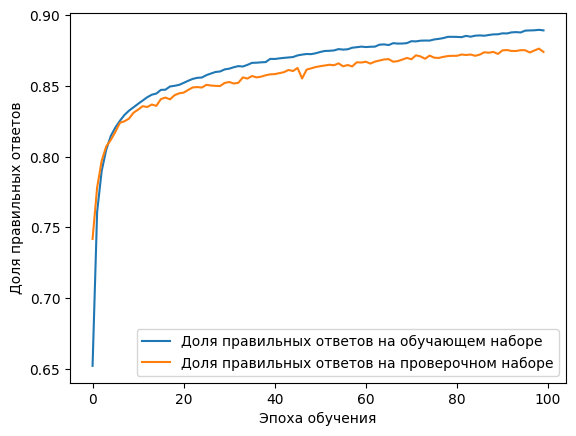

In [11]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

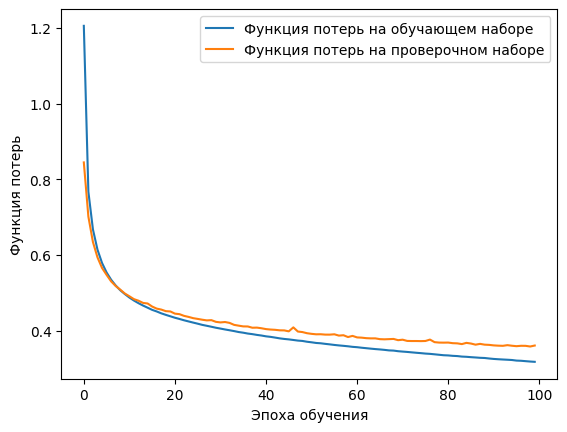

In [12]:
plt.plot(history.history['loss'], 
         label='Функция потерь на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Функция потерь на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Функция потерь')
plt.legend()
plt.show()

## Смотрим информацию по нейронной сети

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (200, 784)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (200, 784)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (200, 800)             │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (200, 10)              │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,012 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [14]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8684 - loss: 0.3816


In [15]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 86.84


## Используем сеть для распознавания предметов одежды

In [16]:
n_rec = 495

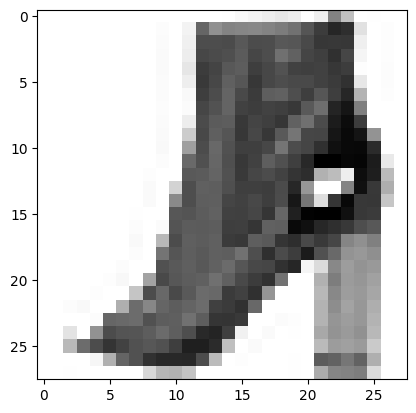

In [17]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [18]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [19]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


**Печатаем результаты распознавания**

In [20]:
prediction

array([[3.0090001e-05, 5.1551785e-07, 1.0746118e-06, 8.8078764e-07,
        4.4419043e-08, 2.9957620e-02, 2.6082282e-05, 3.1846261e-04,
        1.3912633e-05, 9.6965134e-01]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [21]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 9
Название класса: ботинки


**Печатаем правильный ответ**

In [22]:
print("Номер класса:", y_test[0])
print("Название класса:", classes[y_test[0]])

Номер класса: 9
Название класса: ботинки
